In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error
np.random.seed(29)

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

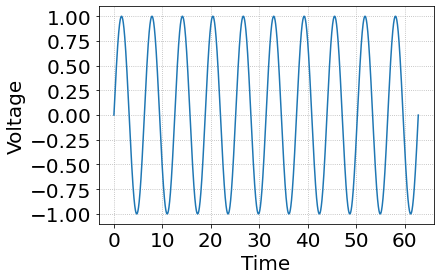

In [2]:
plt.grid(linestyle='dotted')
t = np.linspace(0,20*pi,5000)
x = np.sin(t)
plt.plot(t, x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_input.png", dpi = 300, bbox_inches='tight')

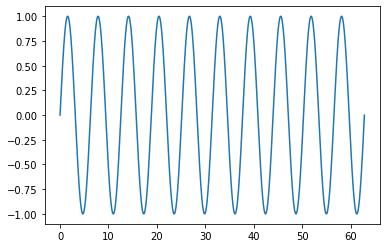

In [3]:
plt.plot(t,x)

In [4]:
dx = fd._differentiate(x, t)

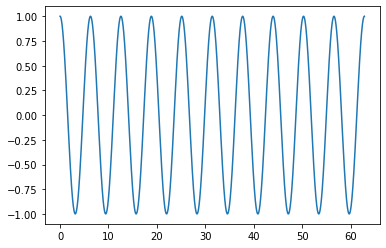

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

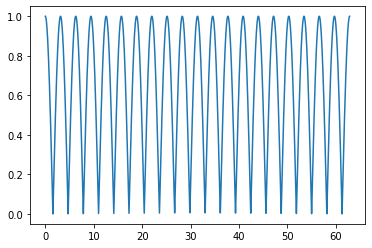

In [7]:
plt.plot(t, mdx)

In [8]:
def model(y, t):
    dydt = np.cos(t) - 0.5*np.abs(np.cos(t))*y - 2*np.cos(t)*np.abs(y)
    return dydt

In [9]:
y0 = 0
y = odeint(model, y0, t)

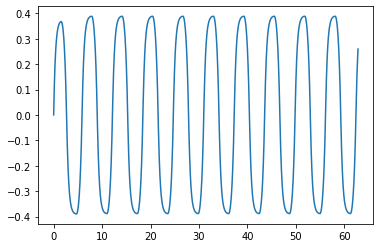

In [10]:
plt.plot(t,y)

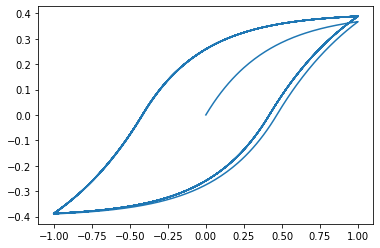

In [11]:
plt.plot(x, y)

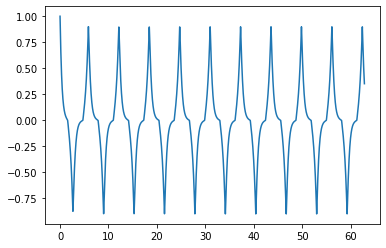

In [12]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

In [13]:
my = np.abs(y)
my = my.reshape(-1,)

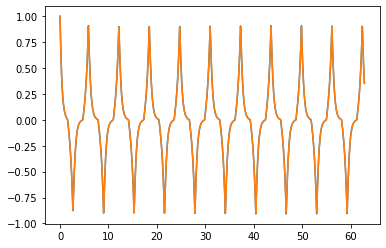

In [14]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
terms = t1-0.5*t2-2*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [15]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [16]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 1.000 x2 + -0.500 x0 x3 + -1.999 x2 x4
(x1)' = 1.000 x2
(x2)' = -1.000 x1
(x3)' = -16.481 1 + -34.102 x0 + 10.088 x1 + -3.174 x2 + 16.000 x3 + 34.380 x4 + -28.383 x0^2 + 58.886 x0 x1 + 17.832 x0 x2 + 36.360 x0 x3 + -41.138 x0 x4 + -11.344 x1^2 + -11.414 x1 x2 + -12.254 x1 x3 + 23.778 x1 x4 + 3.063 x2 x3 + 8.717 x2 x4 + -35.932 x3 x4 + -28.383 x4^2
(x4)' = -332.875 1 + -16.006 x0 + 5.227 x1 + -1.170 x2 + 13.486 x3 + 29.008 x4 + -0.823 x0^2 + 0.828 x0 x1 + 1.517 x0 x2 + 16.149 x0 x3 + -17.505 x0 x4 + 321.379 x1^2 + -1.068 x1 x2 + -5.492 x1 x3 + 9.226 x1 x4 + 159.955 x2^2 + 1.455 x2 x3 + 3.292 x2 x4 + 159.955 x3^2 + -30.258 x3 x4 + -0.823 x4^2


In [17]:
#kkk

In [18]:
c1 = 1
c2 = -0.500
c3 = -1.999
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [19]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

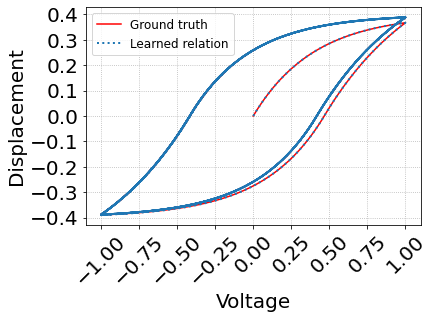

In [20]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide10.png", dpi = 1000, bbox_inches='tight')

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

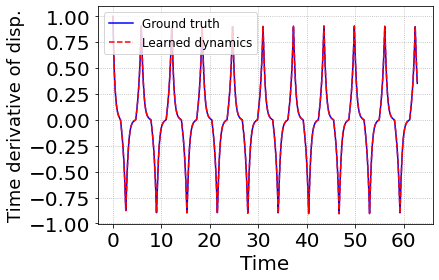

In [21]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of disp.', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_Output.jpg", dpi = 300, bbox_inches='tight')

In [22]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test SINDy: ", relative_error_test*100, "%")

Relative Error Test SINDy:  1.0625824645764056e-05 %


In [23]:
t1=t1.reshape(-1,1)
t2=t2.reshape(-1,1)
t3=t3.reshape(-1,1)
Y = np.concatenate((t1, t2, t3), axis=1)
Y.shape
dy = dy.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.97362112 -0.52313496 -1.88256334]]
[0.00017209]


In [26]:
#kkk

In [27]:
c1 = 0.973
c2 = -0.523
c3 = -1.882
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [28]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [29]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Ridge: ", relative_error_test*100, "%")

Relative Error Test Ridge:  0.004150430852239582 %


In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

In [31]:
linreg.coef_

array([[ 0.99972998, -0.50020186, -1.99882165]])

In [32]:
linreg.intercept_

array([-1.04304442e-06])

In [33]:
#kkk

In [34]:
c1 = 0.999
c2 = -0.500
c3 = -1.998
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [35]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [36]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Lin reg: ", relative_error_test*100, "%")

Relative Error Test Lin reg:  2.3155479806240086e-05 %


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
# Random Seed for dataset generation
sampling_seed = 78
torch.manual_seed(sampling_seed)

# Number of training samples
n_samples = 5000

x = X_train
y = y_train
y = y.reshape(-1,1)

x = x.astype(np.float32)
y = y.astype(np.float32)

x = torch.from_numpy(x)
y = torch.from_numpy(y)

batch_size = n_samples
training_set = DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=batch_size, shuffle=True)

In [40]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)

def NeuralNet_Seq(input_dimension, output_dimension, n_hidden_layers, neurons):
    modules = list()
    modules.append(nn.Linear(input_dimension, neurons))
    modules.append(nn.Tanh())
    for _ in range(n_hidden_layers):
        modules.append(nn.Linear(neurons, neurons))
        modules.append(nn.Tanh())
    modules.append(nn.Linear(neurons, output_dimension))
    model =  nn.Sequential(*modules)
    return model

  


In [41]:
# Model definition
my_network = NeuralNet(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)
# my_network = NeuralNet_Seq(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)

In [42]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
# Model definition

# Predict network value of x
print(my_network(x))

tensor([[-0.1218],
        [ 0.2674],
        [-0.8393],
        ...,
        [-0.7881],
        [ 0.5845],
        [ 0.7786]], grad_fn=<AddmmBackward0>)


In [43]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [44]:
def fit(model, training_set, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (x_train_, u_train_) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                u_pred_ = model(x_train_)
                # Item 1. below
                loss = torch.mean((u_pred_.reshape(-1, ) - u_train_.reshape(-1, ))**p)
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [45]:
n_epochs = 1000
history = fit(my_network, training_set, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  0.9703947901725769
################################  1  ################################
Loss:  0.9239943623542786
################################  2  ################################
Loss:  0.7433448433876038
################################  3  ################################
Loss:  0.57215416431427
################################  4  ################################
Loss:  0.4557439088821411
################################  5  ################################
Loss:  0.38543784618377686
################################  6  ################################
Loss:  0.3384777307510376
################################  7  ################################
Loss:  0.30370694398880005
################################  8  ################################
Loss:  0.27632176876068115
################################  9  ################################
Loss:  0.25384774804115295
################################  10  

Loss:  4.1423874790780246e-05
################################  85  ################################
Loss:  3.911456587957218e-05
################################  86  ################################
Loss:  3.716945866472088e-05
################################  87  ################################
Loss:  3.553707938408479e-05
################################  88  ################################
Loss:  3.415097307879478e-05
################################  89  ################################
Loss:  3.2968375307973474e-05
################################  90  ################################
Loss:  3.194424425601028e-05
################################  91  ################################
Loss:  3.1048704840941355e-05
################################  92  ################################
Loss:  3.025023397640325e-05
################################  93  ################################
Loss:  2.9528975574066862e-05
################################  94  #############################

################################  167  ################################
Loss:  4.4696766963170376e-06
################################  168  ################################
Loss:  4.404433184390655e-06
################################  169  ################################
Loss:  4.345321940490976e-06
################################  170  ################################
Loss:  4.291543064027792e-06
################################  171  ################################
Loss:  4.2423630475241225e-06
################################  172  ################################
Loss:  4.198932856525062e-06
################################  173  ################################
Loss:  4.158807769272244e-06
################################  174  ################################
Loss:  4.1240177779400256e-06
################################  175  ################################
Loss:  4.0914064811659046e-06
################################  176  ################################
Loss:  4.062208

Loss:  1.6110914202727145e-06
################################  251  ################################
Loss:  1.5836263855817378e-06
################################  252  ################################
Loss:  1.557518885419995e-06
################################  253  ################################
Loss:  1.532972760287521e-06
################################  254  ################################
Loss:  1.5105356396816205e-06
################################  255  ################################
Loss:  1.4899152347425115e-06
################################  256  ################################
Loss:  1.4722475043527083e-06
################################  257  ################################
Loss:  1.456429799873149e-06
################################  258  ################################
Loss:  1.4431467434405931e-06
################################  259  ################################
Loss:  1.431030113963061e-06
################################  260  #################

Loss:  1.041344376062625e-06
################################  335  ################################
Loss:  1.0318661907149362e-06
################################  336  ################################
Loss:  1.0218525403615786e-06
################################  337  ################################
Loss:  1.0114301858266117e-06
################################  338  ################################
Loss:  1.0017455451816204e-06
################################  339  ################################
Loss:  9.924773394232034e-07
################################  340  ################################
Loss:  9.83284849098709e-07
################################  341  ################################
Loss:  9.738002972881077e-07
################################  342  ################################
Loss:  9.639635436542449e-07
################################  343  ################################
Loss:  9.538161975797266e-07
################################  344  ####################

Loss:  6.389619784386014e-07
################################  421  ################################
Loss:  6.378050443345273e-07
################################  422  ################################
Loss:  6.366818183778378e-07
################################  423  ################################
Loss:  6.356312951538712e-07
################################  424  ################################
Loss:  6.346645022858866e-07
################################  425  ################################
Loss:  6.338345883705188e-07
################################  426  ################################
Loss:  6.331595159281278e-07
################################  427  ################################
Loss:  6.326117159005662e-07
################################  428  ################################
Loss:  6.32156059054978e-07
################################  429  ################################
Loss:  6.31789305316488e-07
################################  430  #########################

Loss:  6.283170819187944e-07
################################  503  ################################
Loss:  6.282957656367216e-07
################################  504  ################################
Loss:  6.282836011450854e-07
################################  505  ################################
Loss:  6.282624553932692e-07
################################  506  ################################
Loss:  6.282505182753084e-07
################################  507  ################################
Loss:  6.282337494667445e-07
################################  508  ################################
Loss:  6.282089088927023e-07
################################  509  ################################
Loss:  6.281867399593466e-07
################################  510  ################################
Loss:  6.281656510509492e-07
################################  511  ################################
Loss:  6.281479159042647e-07
################################  512  #######################

Loss:  6.269833079386444e-07
################################  586  ################################
Loss:  6.269729624364118e-07
################################  587  ################################
Loss:  6.26960627414519e-07
################################  588  ################################
Loss:  6.269389132285141e-07
################################  589  ################################
Loss:  6.269336836339789e-07
################################  590  ################################
Loss:  6.269187338148186e-07
################################  591  ################################
Loss:  6.268974743761646e-07
################################  592  ################################
Loss:  6.268884931159846e-07
################################  593  ################################
Loss:  6.268782613005897e-07
################################  594  ################################
Loss:  6.268658125918591e-07
################################  595  ########################

Loss:  6.259464839786233e-07
################################  668  ################################
Loss:  6.259331826186099e-07
################################  669  ################################
Loss:  6.259243718886864e-07
################################  670  ################################
Loss:  6.259111842155107e-07
################################  671  ################################
Loss:  6.258954385884863e-07
################################  672  ################################
Loss:  6.258881057874532e-07
################################  673  ################################
Loss:  6.258771350076131e-07
################################  674  ################################
Loss:  6.258698590499989e-07
################################  675  ################################
Loss:  6.25846553248266e-07
################################  676  ################################
Loss:  6.25840812062961e-07
################################  677  #########################

Loss:  6.249909461075731e-07
################################  752  ################################
Loss:  6.24979975327733e-07
################################  753  ################################
Loss:  6.249625812415616e-07
################################  754  ################################
Loss:  6.249553621273662e-07
################################  755  ################################
Loss:  6.249462103369297e-07
################################  756  ################################
Loss:  6.249284183468262e-07
################################  757  ################################
Loss:  6.249231319088722e-07
################################  758  ################################
Loss:  6.249167654459598e-07
################################  759  ################################
Loss:  6.249015314097051e-07
################################  760  ################################
Loss:  6.248914132811478e-07
################################  761  ########################

Loss:  6.240501306820079e-07
################################  839  ################################
Loss:  6.240338734642137e-07
################################  840  ################################
Loss:  6.240278480618144e-07
################################  841  ################################
Loss:  6.240144330149633e-07
################################  842  ################################
Loss:  6.240107381927373e-07
################################  843  ################################
Loss:  6.239934577934036e-07
################################  844  ################################
Loss:  6.239849312805745e-07
################################  845  ################################
Loss:  6.239701519916707e-07
################################  846  ################################
Loss:  6.23961057044653e-07
################################  847  ################################
Loss:  6.239529852791748e-07
################################  848  ########################

Loss:  6.231590532479458e-07
################################  924  ################################
Loss:  6.231581437532441e-07
################################  925  ################################
Loss:  6.23141033884167e-07
################################  926  ################################
Loss:  6.231355769159563e-07
################################  927  ################################
Loss:  6.231153406588419e-07
################################  928  ################################
Loss:  6.231162501535437e-07
################################  929  ################################
Loss:  6.230912958926638e-07
################################  930  ################################
Loss:  6.230910116755695e-07
################################  931  ################################
Loss:  6.230772555682051e-07
################################  932  ################################
Loss:  6.230684448382817e-07
################################  933  ########################

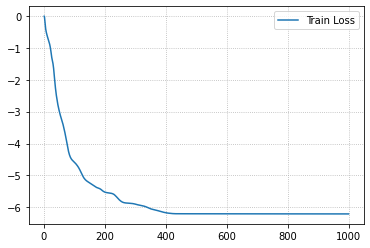

In [46]:
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1,n_epochs+1), np.log10(history), label="Train Loss")
plt.legend()

In [47]:
X_test = X_test.astype(np.float32)
X_test = torch.from_numpy(X_test)

y_test = y_test.astype(np.float32)
y_test = torch.from_numpy(y_test)

y_test_pred = my_network(X_test).reshape(-1,1)

In [48]:
y_test = y_test.reshape(-1,1)

In [49]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((y_test_pred - y_test)**2)/torch.mean(y_test**2)
print("Relative Error Test DNN: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test DNN:  0.0004834499122807756 %


In [50]:
y_test_pred.shape

torch.Size([1250, 1])

In [51]:
y_test.shape

torch.Size([1250, 1])